In [1]:
import sys
sys.path.append('..')

import os

import numpy as np
import pandas as pd
import scipy as sp

# import tensorflow as tf
# from tensorflow.keras import Model, Input, losses, layers, optimizers

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score

from matplotlib import pyplot as plt
# from matplotlib.colors import BoundaryNorm
# import seaborn as sns

# import itertools
from tqdm.auto import trange, tqdm

from pathlib import Path

from src.datasets import adults
# from src.evaluation import data_benchmark
# from src.models import vae_keras
# from src.datasets import adults#, dataset_utils

# print(tf.config.list_physical_devices('GPU'))
# tf.debugging.set_log_device_placement(True)

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# import tensorflow as tf
# for gpu in tf.config.list_physical_devices('GPU'):
#     tf.config.experimental.set_memory_growth(gpu, True)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


<Figure size 2400x1200 with 0 Axes>

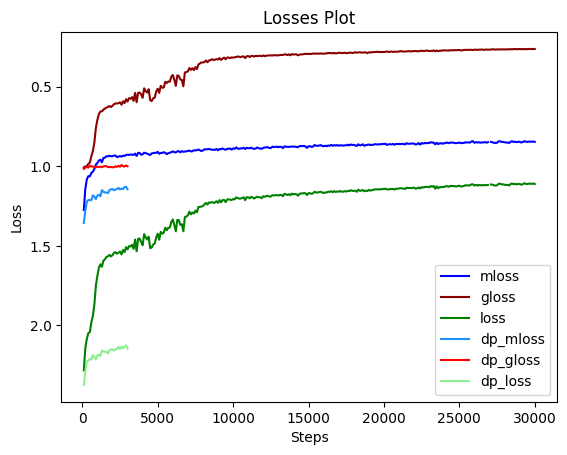

In [54]:
non_dp = np.genfromtxt('../exp/adult/vanilla/5/loss.csv', delimiter=',', names=True)
dp = np.genfromtxt('../exp/adult/dp/5-e500s0.2/loss.csv', delimiter=',', names=True)
# print(non_dp)
# print(dp)

non_dp_df = pd.DataFrame(non_dp, columns = ['step','mloss','gloss', 'loss'])
dp_df = pd.DataFrame(dp, columns = ['step','mloss','gloss', 'loss'])


non_dp_df = non_dp_df.set_index('step')
dp_df = dp_df.set_index('step')
# print(non_dp_df)

# non_dp_df['mloss2'] = dp_df.mloss
# non_dp_df['gloss2'] = dp_df.gloss

# dp_df['loss2'] = non_dp_df.loss

non_dp_df['dp_mloss'] = dp_df.mloss
non_dp_df['dp_gloss'] = dp_df.gloss
non_dp_df['dp_loss'] = dp_df.loss

# print(non_dp_df)
# print(dp_df)
# non_dp_df = non_dp_df.drop(['mloss', 'gloss', 'loss'], axis=1)

# Visualizing The Price of the stocks 
# to set the plot size 
plt.figure(figsize=(16, 8), dpi=150) 
  
# using .plot method to plot stock prices. 
# we have passed colors as a list 

# non_dp_df = non_dp_df[::-1]
non_dp_df.plot(label='test', color=['blue','darkred', 'green', 'dodgerblue', 'red', 'lightgreen']) 
plt.gca().invert_yaxis()

# adding title 
plt.title('Losses Plot') 
  
# adding label to x-axis 
plt.xlabel('Steps') 
plt.ylabel('Loss') 
  
# adding legend. 
plt.legend() 

In [41]:
non_dp_df[::-1]

,mloss,gloss,loss,dp_mloss,dp_gloss,dp_loss
step,,,,,,
30000.0,0.8473,0.2645,1.1118,NaN,NaN,NaN
29900.0,0.8448,0.2637,1.1085,NaN,NaN,NaN
29800.0,0.8465,0.2648,1.1113,NaN,NaN,NaN
29700.0,0.8457,0.2638,1.1095,NaN,NaN,NaN
29600.0,0.8458,0.2639,1.1097,NaN,NaN,NaN
...,...,...,...,...,...,...
500.0,1.0639,0.9777,2.0416,1.2126,0.9974,2.2100
400.0,1.0625,0.9850,2.0475,1.2121,1.0083,2.2204
300.0,1.0827,1.0017,2.0844,1.2231,1.0054,2.2285


<Figure size 2400x1200 with 0 Axes>

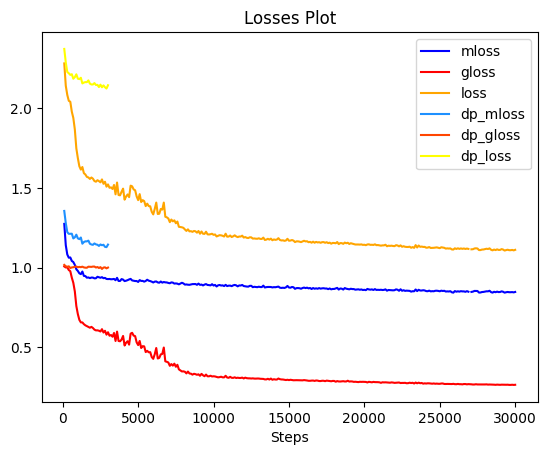